<a href="https://colab.research.google.com/github/gowri1-A/detection_of_herpeszoster/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = "/content/archive (1).zip"
extract_path = "/content/archive(1)"

# Extract
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("‚úÖ Dataset extracted to:", extract_path)
print("Total original images:", len(os.listdir(extract_path)))



‚úÖ Dataset extracted to: /content/archive(1)
Total original images: 1


In [ ]:
import os

for root, dirs, files in os.walk("/content/archive(1)"):
    print("üìÇ", root, " | Folders:", dirs, " | Files:", len(files))


üìÇ /content/archive(1)  | Folders: ['skin-disease-datasaet']  | Files: 0
üìÇ /content/archive(1)/skin-disease-datasaet  | Folders: ['test_set', 'train_set']  | Files: 0
üìÇ /content/archive(1)/skin-disease-datasaet/test_set  | Folders: ['VI-shingles', 'testset']  | Files: 0
üìÇ /content/archive(1)/skin-disease-datasaet/test_set/VI-shingles  | Folders: []  | Files: 33
üìÇ /content/archive(1)/skin-disease-datasaet/test_set/testset  | Folders: ['VI-chickenpox']  | Files: 0
üìÇ /content/archive(1)/skin-disease-datasaet/test_set/testset/VI-chickenpox  | Folders: []  | Files: 34
üìÇ /content/archive(1)/skin-disease-datasaet/train_set  | Folders: ['trainset', 'VI-shingles']  | Files: 0
üìÇ /content/archive(1)/skin-disease-datasaet/train_set/trainset  | Folders: ['VI-chickenpox']  | Files: 0
üìÇ /content/archive(1)/skin-disease-datasaet/train_set/trainset/VI-chickenpox  | Folders: []  | Files: 136
üìÇ /content/archive(1)/skin-disease-datasaet/train_set/VI-shingles  | Folders: []  | 

In [ ]:
import zipfile, os, shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# -----------------------------
# 1. Unzip dataset
# -----------------------------
zip_path = "/content/archive (1).zip"
extract_path = "/content/archive(1)"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("‚úÖ Dataset extracted to:", extract_path)

# -----------------------------
# 2. Define input folders
# -----------------------------
train_shingles = "/content/archive(1)/skin-disease-datasaet/train_set/VI-shingles"
test_shingles = "/content/archive(1)/skin-disease-datasaet/test_set/VI-shingles"

train_chickenpox = "/content/archive(1)/skin-disease-datasaet/train_set/trainset/VI-chickenpox"
test_chickenpox = "/content/archive(1)/skin-disease-datasaet/test_set/testset/VI-chickenpox"

# -----------------------------
# 3. Define output structure
# -----------------------------
final_dataset = "/content/final_dataset"
final_train_shingles = os.path.join(final_dataset, "train/VI-shingles")
final_test_shingles = os.path.join(final_dataset, "test/VI-shingles")
final_train_chickenpox = os.path.join(final_dataset, "train/VI-chickenpox")
final_test_chickenpox = os.path.join(final_dataset, "test/VI-chickenpox")

for folder in [final_train_shingles, final_test_shingles, final_train_chickenpox, final_test_chickenpox]:
    os.makedirs(folder, exist_ok=True)

# -----------------------------
# 4. Copy chickenpox directly
# -----------------------------
for f in os.listdir(train_chickenpox):
    shutil.copy(os.path.join(train_chickenpox, f), final_train_chickenpox)

for f in os.listdir(test_chickenpox):
    shutil.copy(os.path.join(test_chickenpox, f), final_test_chickenpox)

# -----------------------------
# 5. Augment shingles
# -----------------------------
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

def augment_images(input_folder, output_folder, target_count):
    current_count = len(os.listdir(input_folder))
    needed = target_count - current_count
    print(f"üìÇ {input_folder} ‚Üí Current: {current_count}, Need extra: {needed}")
    generated = 0

    for img_name in os.listdir(input_folder):
        if generated >= needed:
            break
        img_path = os.path.join(input_folder, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        i = 0
        for batch in datagen.flow(x, batch_size=1,
                                  save_to_dir=output_folder,
                                  save_prefix="aug",
                                  save_format="jpg"):
            i += 1
            generated += 1
            if generated >= needed or i > 3:  # max 3 per image
                break

    print(f"‚úÖ {generated} new images created. Final total: {len(os.listdir(output_folder))}")

# Copy originals first
for f in os.listdir(train_shingles):
    shutil.copy(os.path.join(train_shingles, f), final_train_shingles)

for f in os.listdir(test_shingles):
    shutil.copy(os.path.join(test_shingles, f), final_test_shingles)

# Augment shingles ‚Üí target ~200 in train, ~100 in test
augment_images(train_shingles, final_train_shingles, target_count=200)
augment_images(test_shingles, final_test_shingles, target_count=100)

# -----------------------------
# 6. Final check
# -----------------------------
print("\n‚úÖ Final dataset ready!")
print("Train shingles:", len(os.listdir(final_train_shingles)))
print("Train chickenpox:", len(os.listdir(final_train_chickenpox)))
print("Test shingles:", len(os.listdir(final_test_shingles)))
print("Test chickenpox:", len(os.listdir(final_test_chickenpox)))

‚úÖ Dataset extracted to: /content/archive(1)
üìÇ /content/archive(1)/skin-disease-datasaet/train_set/VI-shingles ‚Üí Current: 130, Need extra: 70
‚úÖ 70 new images created. Final total: 200
üìÇ /content/archive(1)/skin-disease-datasaet/test_set/VI-shingles ‚Üí Current: 33, Need extra: 67
‚úÖ 67 new images created. Final total: 100

‚úÖ Final dataset ready!
Train shingles: 200
Train chickenpox: 136
Test shingles: 100
Test chickenpox: 34


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/final_dataset/train"
test_dir = "/content/final_dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary"
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=32,
    class_mode="binary"
)


Found 336 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Base model (pretrained)
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False  # freeze feature extractor

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
preds = Dense(1, activation="sigmoid")(x)  # binary classification

model = Model(inputs=base_model.input, outputs=preds)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train model
history = model.fit(
    train_gen,
    validation_data=test_gen,
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 431ms/step - accuracy: 0.4669 - loss: 0.8791 - val_accuracy: 0.8582 - val_loss: 0.3228
Epoch 2/5
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 303ms/step - accuracy: 0.8257 - loss: 0.4123 - val_accuracy: 0.9030 - val_loss: 0.1912
Epoch 3/5
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 363ms/step - accuracy: 0.8964 - loss: 0.2728 - val_accuracy: 0.9478 - val_loss: 0.1326
Epoch 4/5
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 297ms/step - accuracy: 0.9533 - loss: 0.1697 - val_accuracy: 0.9627 - val_loss: 0.1060
Epoch 5/5
11/11 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 304ms/step - accuracy: 0.9511 - loss: 0.1276 - val_accuracy: 0.9627 - val_loss: 0.0907


In [ ]:
model.save("shingles_classifier.h5")


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("shingles_classifier.h5")

# Path to test image
img_path = "/content/final_dataset/test/VI-shingles/100_VI-shingles (27).jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("‚úÖ Prediction: Shingles")
else:
    print("‚úÖ Prediction: Not Shingles")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 767ms/step
‚úÖ Prediction: Shingles


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("shingles_classifier.h5")

# Path to test image
img_path = "/content/final_dataset/test/VI-shingles/aug_0_5073.jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("‚úÖ Prediction: Shingles")
else:
    print("‚úÖ Prediction: Not Shingles")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 758ms/step
‚úÖ Prediction: Shingles


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("shingles_classifier.h5")

# Path to test image
img_path = "/content/final_dataset/test/VI-shingles/aug_0_5073.jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("‚úÖ Prediction: Shingles")
else:
    print("‚úÖ Prediction: Not Shingles")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 784ms/step


KeyboardInterrupt: 

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("shingles_classifier.h5")

# Path to test image
img_path = "/content/final_dataset/test/VI-chickenpox/107_VI-chickenpox (17).jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)

# Show result
if prediction[0][0] > 0.5:
    print("‚úÖ Prediction: Shingles")
else:
    print("‚úÖ Prediction: Not Shingles")

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 782ms/step
‚úÖ Prediction: Not Shingles


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Paths
train_dir = "/content/final_dataset/train"
test_dir  = "/content/final_dataset/test"

# Load feature extractor (no top layer)
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# Function to extract features from folder
def extract_features(directory, label):
    features, labels = [], []
    for fname in os.listdir(directory):
        img_path = os.path.join(directory, fname)
        img = image.load_img(img_path, target_size=(128,128))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)
        feature = base_model.predict(img_array)  # feature vector
        features.append(feature.flatten())
        labels.append(label)
    return np.array(features), np.array(labels)

# Extract features for shingles (1) and chickenpox (0)
train_shingles, y1 = extract_features(os.path.join(train_dir, "VI-shingles"), 1)
train_chickenpox, y0 = extract_features(os.path.join(train_dir, "VI-chickenpox"), 0)

X_train = np.vstack([train_shingles, train_chickenpox])
y_train = np.concatenate([y1, y0])

test_shingles, yt1 = extract_features(os.path.join(test_dir, "VI-shingles"), 1)
test_chickenpox, yt0 = extract_features(os.path.join(test_dir, "VI-chickenpox"), 0)

X_test = np.vstack([test_shingles, test_chickenpox])
y_test = np.concatenate([yt1, yt0])

# üîπ Train SVM
svm = SVC(kernel="linear", probability=True)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# üîπ Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 69ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 72ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 55ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 50ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0

In [ ]:
# Path to single test image
img_path = "/content/final_dataset/test/VI-shingles/100_VI-shingles (27).jpg"

# Preprocess + extract features
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
feature = base_model.predict(img_array).flatten().reshape(1, -1)

# Predict with SVM
svm_prediction = svm.predict(feature)[0]
if svm_prediction == 1:
    print("‚úÖ SVM Prediction: Shingles")
else:
    print("‚úÖ SVM Prediction: Not Shingles")

# Predict with KNN
knn_prediction = knn.predict(feature)[0]
if knn_prediction == 1:
    print("‚úÖ KNN Prediction: Shingles")
else:
    print("‚úÖ KNN Prediction: Not Shingles")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Shingles


In [ ]:
# Path to single test image
img_path = "/content/final_dataset/test/VI-chickenpox/122_VI-chickenpox (7).jpg"

# Preprocess + extract features
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
feature = base_model.predict(img_array).flatten().reshape(1, -1)

# Predict with SVM
svm_prediction = svm.predict(feature)[0]
if svm_prediction == 1:
    print("‚úÖ SVM Prediction: Shingles")
else:
    print("‚úÖ SVM Prediction: Not Shingles")

# Predict with KNN
knn_prediction = knn.predict(feature)[0]
if knn_prediction == 1:
    print("‚úÖ KNN Prediction: Shingles")
else:
    print("‚úÖ KNN Prediction: Not Shingles")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
‚úÖ SVM Prediction: Not Shingles
‚úÖ KNN Prediction: Not Shingles


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 3s/step
‚úÖ CNN Prediction: Shingles


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


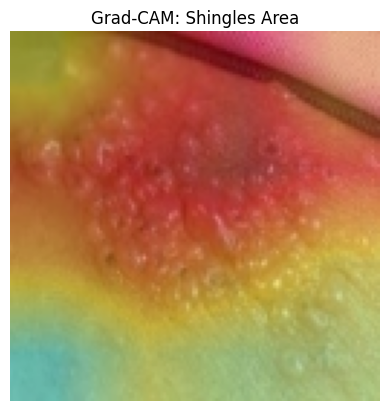

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf

# Load trained CNN model
cnn_model = load_model("shingles_classifier.h5")

# Grad-CAM function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Path to test image
img_path = "/content/final_dataset/test/VI-shingles/100_VI-shingles (27).jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# üîπ CNN Prediction
cnn_pred = cnn_model.predict(img_array)[0][0]

if cnn_pred > 0.5:
    print("‚úÖ CNN Prediction: Shingles")

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, cnn_model)

    # Load original image for overlay
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap to image size
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Show result
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()

else:
    print("‚úÖ CNN Prediction: Not Shingles (No Grad-CAM)")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf

# Load trained CNN model
cnn_model = load_model("shingles_classifier.h5")

# Grad-CAM function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# Path to test image
img_path = "/content/final_dataset/test/VI-chickenpox/122_VI-chickenpox (7).jpg"

# Preprocess image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# üîπ CNN Prediction
cnn_pred = cnn_model.predict(img_array)[0][0]

if cnn_pred > 0.5:
    print("‚úÖ CNN Prediction: Shingles")

    # Generate Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(img_array, cnn_model)

    # Load original image for overlay
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap to image size
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    # Superimpose heatmap on image
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    # Show result
    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()

else:
    print("‚úÖ CNN Prediction: Not Shingles (No Grad-CAM)")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 765ms/step
‚úÖ CNN Prediction: Not Shingles (No Grad-CAM)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 5s/step
‚úÖ CNN Prediction: Shingles


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 781ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Shingles


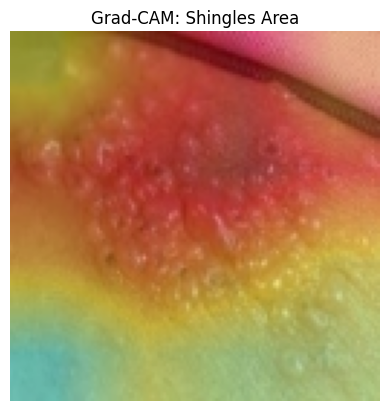

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/final_dataset/test/VI-shingles/100_VI-shingles (27).jpg"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/google_shingles1.jpg"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
‚úÖ CNN Prediction: Not Shingles
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step   
‚úÖ SVM Prediction: Not Shingles
‚úÖ KNN Prediction: Not Shingles
‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 889ms/step
‚úÖ CNN Prediction: Shingles
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 878ms/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Shingles


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


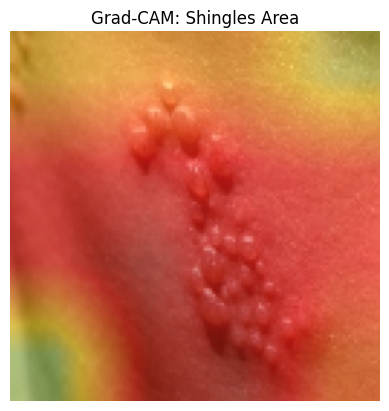

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/google_shingles2.webp"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
‚úÖ CNN Prediction: Shingles
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 942ms/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Not Shingles


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


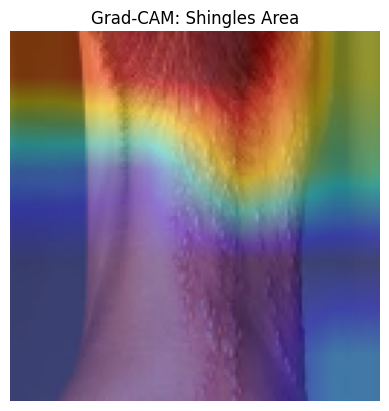

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/google_shingles3.jpg"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/google_shingles1.jpg"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 840ms/step
‚úÖ CNN Prediction: Not Shingles
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 825ms/step
‚úÖ SVM Prediction: Not Shingles
‚úÖ KNN Prediction: Not Shingles
‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/google_shingles4.webp"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 895ms/step
‚úÖ CNN Prediction: Not Shingles
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Shingles
‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import joblib  # for loading SVM/KNN if saved

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")
# SVM/KNN models assumed trained already in this session
# Or you can load from saved files:
# svm = joblib.load("svm_model.pkl")
# knn = joblib.load("knn_model.pkl")

# MobileNet feature extractor for SVM/KNN
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    heatmap = np.maximum(heatmap, 0) / tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
img_path = "/content/google_shingles5.webp"

# Preprocess for CNN
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0
img_array_exp = np.expand_dims(img_array, axis=0)

# -----------------------------
# CNN Prediction
cnn_pred = cnn_model.predict(img_array_exp)[0][0]
cnn_result = "Shingles" if cnn_pred > 0.5 else "Not Shingles"
print(f"‚úÖ CNN Prediction: {cnn_result}")

# -----------------------------
# Extract features for SVM/KNN
feature = base_model.predict(img_array_exp).flatten().reshape(1, -1)

# -----------------------------
# SVM Prediction
svm_pred = svm.predict(feature)[0]
print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

# -----------------------------
# KNN Prediction
knn_pred = knn.predict(feature)[0]
print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

# -----------------------------
# Show Grad-CAM only if CNN says Shingles
if cnn_result == "Shingles":
    heatmap = make_gradcam_heatmap(img_array_exp, cnn_model)

    # Load original image
    original_img = cv2.imread(img_path)
    original_img = cv2.resize(original_img, (128,128))

    # Resize heatmap and overlay
    heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)

    plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Grad-CAM: Shingles Area")
    plt.show()
else:
    print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 941ms/step
‚úÖ CNN Prediction: Not Shingles
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 935ms/step
‚úÖ SVM Prediction: Not Shingles
‚úÖ KNN Prediction: Not Shingles
‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown


In [ ]:
print("CNN raw probability:", cnn_pred)


CNN raw probability: 0.06958303


In [ ]:
print("SVM probability:", svm.decision_function(feature))
print("KNN neighbors:", knn.kneighbors(feature))


SVM probability: [-0.64020137]
KNN neighbors: (array([[29.33679008, 29.59765816, 29.59923935, 29.78527069, 29.93120193]]), array([[329, 327, 237, 301, 293]]))


In [ ]:
import numpy as np
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

# Paths
train_dir = "/content/final_dataset/train"
test_dir  = "/content/final_dataset/test"

# Load feature extractor (no top layer)
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# Function to extract features from folder with MobileNet preprocessing
def extract_features(directory, label):
    features, labels = [], []
    for fname in os.listdir(directory):
        img_path = os.path.join(directory, fname)
        img = image.load_img(img_path, target_size=(128,128))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)  # use MobileNetV2 preprocessing
        feature = base_model.predict(img_array)  # feature vector
        features.append(feature.flatten())
        labels.append(label)
    return np.array(features), np.array(labels)

# Extract features
train_shingles, y1 = extract_features(os.path.join(train_dir, "VI-shingles"), 1)
train_chickenpox, y0 = extract_features(os.path.join(train_dir, "VI-chickenpox"), 0)

X_train = np.vstack([train_shingles, train_chickenpox])
y_train = np.concatenate([y1, y0])

# Shuffle training data
X_train, y_train = shuffle(X_train, y_train, random_state=42)

test_shingles, yt1 = extract_features(os.path.join(test_dir, "VI-shingles"), 1)
test_chickenpox, yt0 = extract_features(os.path.join(test_dir, "VI-chickenpox"), 0)

X_test = np.vstack([test_shingles, test_chickenpox])
y_test = np.concatenate([yt1, yt0])

# -----------------------------
# Train SVM with tuned hyperparameter
# -----------------------------
svm = SVC(kernel="rbf", C=5, gamma='scale', probability=True)  # RBF kernel can improve non-linear separation
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))

# -----------------------------
# Train KNN with tuned neighbors
# -----------------------------
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski')  # fewer neighbors can reduce misclassification on small dataset
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 45ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 39ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 40ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 41ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 47ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0

In [ ]:
img_array = preprocess_input(img_array)


In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import joblib

# Paths
train_dir = "/content/final_dataset/train"

# MobileNetV2 feature extractor
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# Feature extraction
def extract_features(directory, label):
    features, labels = [], []
    for fname in os.listdir(directory):
        img_path = os.path.join(directory, fname)
        img = image.load_img(img_path, target_size=(128,128))
        img_array = np.expand_dims(image.img_to_array(img), axis=0)
        img_array = preprocess_input(img_array)
        feature = base_model.predict(img_array)
        features.append(feature.flatten())
        labels.append(label)
    return np.array(features), np.array(labels)

# Train data
train_shingles, y1 = extract_features(os.path.join(train_dir, "VI-shingles"), 1)
train_chickenpox, y0 = extract_features(os.path.join(train_dir, "VI-chickenpox"), 0)

X_train = np.vstack([train_shingles, train_chickenpox])
y_train = np.concatenate([y1, y0])

# Shuffle and scale
X_train, y_train = shuffle(X_train, y_train, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Train SVM
svm = SVC(kernel="rbf", C=5, gamma='scale', probability=True)
svm.fit(X_train, y_train)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Save models
joblib.dump(svm, "svm_model.pkl")
joblib.dump(knn, "knn_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("‚úÖ Models trained and saved!")



1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 951ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 46ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 42ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 48ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 43ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 64ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 60ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 62ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 56ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 54ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 61ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 65ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
svm = joblib.load("svm_model.pkl")
knn = joblib.load("knn_model.pkl")
scaler = joblib.load("scaler.pkl")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
import tensorflow as tf
import joblib  # for loading SVM/KNN

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")

# Load trained SVM and KNN
svm = joblib.load("svm_model.pkl")
knn = joblib.load("knn_model.pkl")

# MobileNetV2 feature extractor for SVM/KNN
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
def predict_shingles(img_path, cnn_threshold=0.5):
    # Load image
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0)

    # CNN preprocessing (0-255 scaled)
    cnn_input = img_array_exp / 255.0
    cnn_pred = cnn_model.predict(cnn_input)[0][0]
    cnn_result = "Shingles" if cnn_pred > cnn_threshold else "Not Shingles"
    print(f"‚úÖ CNN Prediction: {cnn_result} (Probability: {cnn_pred:.4f})")

    # MobileNet preprocessing for SVM/KNN
    feature = preprocess_input(img_array_exp)
    feature_vector = base_model.predict(feature).flatten().reshape(1, -1)

    # SVM Prediction
    svm_pred = svm.predict(feature_vector)[0]
    print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

    # KNN Prediction
    knn_pred = knn.predict(feature_vector)[0]
    print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

    # Grad-CAM only if CNN predicts shingles
    if cnn_result == "Shingles":
        heatmap = make_gradcam_heatmap(cnn_input, cnn_model)
        original_img = cv2.imread(img_path)
        original_img = cv2.resize(original_img, (128,128))
        heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Grad-CAM: Shingles Area")
        plt.show()
    else:
        print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")

# -----------------------------
# Example usage
# -----------------------------
img_path = "/content/google_shingles5.webp"
predict_shingles(img_path)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 917ms/step
‚úÖ CNN Prediction: Not Shingles (Probability: 0.0696)
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Not Shingles
‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
import tensorflow as tf
import joblib  # for loading SVM/KNN

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")

# Load trained SVM and KNN
svm = joblib.load("svm_model.pkl")
knn = joblib.load("knn_model.pkl")

# MobileNetV2 feature extractor for SVM/KNN
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
def predict_shingles(img_path, cnn_threshold=0.5):
    # Load image
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0)

    # CNN preprocessing (0-255 scaled)
    cnn_input = img_array_exp / 255.0
    cnn_pred = cnn_model.predict(cnn_input)[0][0]
    cnn_result = "Shingles" if cnn_pred > cnn_threshold else "Not Shingles"
    print(f"‚úÖ CNN Prediction: {cnn_result} (Probability: {cnn_pred:.4f})")

    # MobileNet preprocessing for SVM/KNN
    feature = preprocess_input(img_array_exp)
    feature_vector = base_model.predict(feature).flatten().reshape(1, -1)

    # SVM Prediction
    svm_pred = svm.predict(feature_vector)[0]
    print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

    # KNN Prediction
    knn_pred = knn.predict(feature_vector)[0]
    print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

    # Grad-CAM only if CNN predicts shingles
    if cnn_result == "Shingles":
        heatmap = make_gradcam_heatmap(cnn_input, cnn_model)
        original_img = cv2.imread(img_path)
        original_img = cv2.resize(original_img, (128,128))
        heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Grad-CAM: Shingles Area")
        plt.show()
    else:
        print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")

# -----------------------------
# Example usage
# -----------------------------
img_path = "/content/google_shingles1.jpg"
predict_shingles(img_path)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
‚úÖ CNN Prediction: Not Shingles (Probability: 0.0204)
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 947ms/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Not Shingles
‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 1s/step
‚úÖ CNN Prediction: Shingles (Probability: 0.9883)
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 909ms/step
‚úÖ SVM Prediction: Shingles
‚úÖ KNN Prediction: Shingles


/usr/local/lib/python3.12/dist-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer_1']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


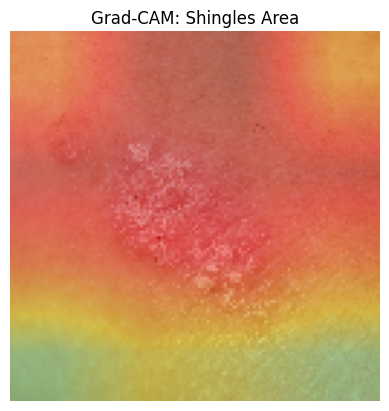

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
import tensorflow as tf
import joblib  # for loading SVM/KNN

# -----------------------------
# Load Models
# -----------------------------
cnn_model = load_model("shingles_classifier.h5")

# Load trained SVM and KNN
svm = joblib.load("svm_model.pkl")
knn = joblib.load("knn_model.pkl")

# MobileNetV2 feature extractor for SVM/KNN
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg", input_shape=(128,128,3))

# -----------------------------
# Grad-CAM Function
# -----------------------------
def make_gradcam_heatmap(img_array, model, last_conv_layer_name="Conv_1"):
    grad_model = Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = np.maximum(heatmap, 0)
    if tf.reduce_max(heatmap) != 0:
        heatmap /= tf.reduce_max(heatmap)
    return heatmap.numpy()

# -----------------------------
# Single Image Prediction
# -----------------------------
def predict_shingles(img_path, cnn_threshold=0.5):
    # Load image
    img = image.load_img(img_path, target_size=(128,128))
    img_array = image.img_to_array(img)
    img_array_exp = np.expand_dims(img_array, axis=0)

    # CNN preprocessing (0-255 scaled)
    cnn_input = img_array_exp / 255.0
    cnn_pred = cnn_model.predict(cnn_input)[0][0]
    cnn_result = "Shingles" if cnn_pred > cnn_threshold else "Not Shingles"
    print(f"‚úÖ CNN Prediction: {cnn_result} (Probability: {cnn_pred:.4f})")

    # MobileNet preprocessing for SVM/KNN
    feature = preprocess_input(img_array_exp)
    feature_vector = base_model.predict(feature).flatten().reshape(1, -1)

    # SVM Prediction
    svm_pred = svm.predict(feature_vector)[0]
    print(f"‚úÖ SVM Prediction: {'Shingles' if svm_pred==1 else 'Not Shingles'}")

    # KNN Prediction
    knn_pred = knn.predict(feature_vector)[0]
    print(f"‚úÖ KNN Prediction: {'Shingles' if knn_pred==1 else 'Not Shingles'}")

    # Grad-CAM only if CNN predicts shingles
    if cnn_result == "Shingles":
        heatmap = make_gradcam_heatmap(cnn_input, cnn_model)
        original_img = cv2.imread(img_path)
        original_img = cv2.resize(original_img, (128,128))
        heatmap = cv2.resize(heatmap, (original_img.shape[1], original_img.shape[0]))
        heatmap = np.uint8(255 * heatmap)
        heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
        superimposed_img = cv2.addWeighted(original_img, 0.6, heatmap, 0.4, 0)
        plt.imshow(cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title("Grad-CAM: Shingles Area")
        plt.show()
    else:
        print("‚ùå CNN Prediction is Not Shingles ‚Üí Grad-CAM not shown")

# -----------------------------
# Example usage
# -----------------------------
img_path = "/content/google_notshingles1.webp"
predict_shingles(img_path)
